#### 교차검증을 간단하게 하는 방법
- 프로세스(폴드 설정 -> 루프반복을 통해서 학습 및 테스트의 인덱스 추출 -> 학습과 예측)

- cross_val_score(예측모델, 피처셋트, 레이블, 성능평가 지표, 폴드 수)

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [2]:
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
data  = iris_data.data
label = iris_data.target

In [4]:
dt_clf = DecisionTreeClassifier(random_state = 100)

# 성능평가 지표는 acc, 교차검증 5개
scores = cross_val_score(dt_clf, data, label, cv=5, scoring='accuracy')
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [5]:
print('평균검증 정확도 :', np.round(np.mean(scores), 4 ) )

평균검증 정확도 : 0.9533


In [6]:
scores = cross_validate(dt_clf, data, label, cv=5, scoring='accuracy')
scores

{'fit_time': array([0.        , 0.        , 0.        , 0.00425196, 0.        ]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])}

#### 교차검증과 하이퍼파라미터를 한번에 할 수 있는 
- GridSearchCV

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 샘플 데이터 생성
grp01 = np.array ([0.3, 0.4, 0.3])
grp02 = np.array ([0.7, 0.2, 0.1])
grp03 = np.array ([0.01, 0.01, 0.98])

In [9]:
from IPython.display import image
image ('c:/img/entropy.png', width = 700)

ImportError: cannot import name 'image' from 'IPython.display' (C:\Users\Changho\anaconda3\lib\site-packages\IPython\display.py)

In [10]:
# 만약 3개 Yes 이고, 2개가 No
# 엔트로피 
# H = -(2/5)log(2/5)-(3/5)log(3/5) = 0.971

In [11]:
def entropy(x) :
    return (-x*np.log2(x)).sum()

In [12]:
e01 = entropy(grp01)
e02 = entropy(grp02)
e03 = entropy(grp03)

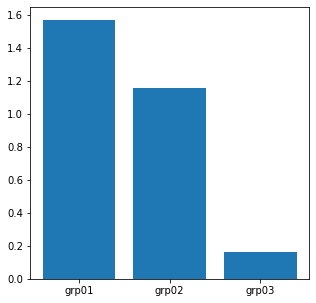

In [13]:
plt.figure(figsize=(5,5))

plt.bar(['grp01', 'grp02', 'grp03'], [e01, e02, e03])

plt.show()
plt.close()

In [14]:
import graphviz

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

- min_samples_split : 노드를 분리하기 위한 최소한의 샘플 수 (과적합을 제어할 때 사용)
- min_samples_leaf  : 리프노드가 되기 위한 최소한의 샘플 수 (과적합을 제어할 때 사용)
- max_features      : 
- max_depth         : 트리의 최대 깊이
- max_leaf_nodes    : 리프노드의 최대 수

In [16]:
dt_clf = DecisionTreeClassifier (random_state=100, criterion='entropy')

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=100)

# 학습 fit
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [17]:
from sklearn.tree import export_graphviz

export_graphviz (dt_clf,
                out_file = 'iris_tree.dot',
                class_names = iris_data.target_names,
                feature_names = iris_data.feature_names,
                impurity = True,
                filled = True)

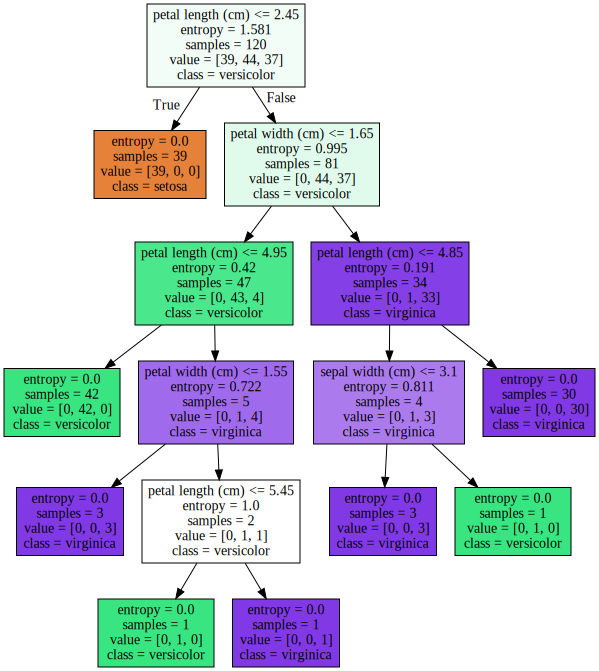

In [18]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

with open('iris_tree.dot') as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

- GridSearchCV

In [19]:
from sklearn.tree            import DecisionTreeClassifier
from sklearn.datasets        import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics         import accuracy_score

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

- estimator  : 분류기 (알고리즘)
- param_grid : { para, : value, param : value }
- scoring    : 평가방법을 지정
- refit      : True(최적의 하이퍼 파라미터를 찾는 재학습)

In [20]:
# grid_parameter = { 'max_depth' : [1,2,3],
#                    'min_samples_split' : [2, 3]}
# pd.read_csv('Grid.csv', index_col ='순번')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=100)

dt_clf = DecisionTreeClassifier (random_state=100)

grid_parameter = { 'max_depth' : [1,2,3],'min_samples_split' : [2, 3]}

In [22]:
dt_searchCV = GridSearchCV(dt_clf, param_grid = grid_parameter, cv = 3, refit = True)
dt_searchCV.fit (X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [23]:
scoreDF = pd.DataFrame(dt_searchCV.cv_results_)
scoreDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000997,2.247832e-07,0.000000,0.00000,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.70,0.700,0.675,0.691667,0.011785,5
1,0.000332,4.699093e-04,0.000000,0.00000,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.70,0.700,0.675,0.691667,0.011785,5
2,0.000000,0.000000e+00,0.000000,0.00000,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.95,0.900,1.000,0.950000,0.040825,3
3,0.000997,8.104673e-07,0.000000,0.00000,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.95,0.900,1.000,0.950000,0.040825,3
4,0.000997,6.257699e-07,0.000000,0.00000,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.95,0.975,1.000,0.975000,0.020412,1
5,0.000665,4.701903e-04,0.000333,0.00047,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.95,0.975,1.000,0.975000,0.020412,1


In [24]:
scoreDF[['params', 'rank_test_score']]

,params,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",5
1,"{'max_depth': 1, 'min_samples_split': 3}",5
2,"{'max_depth': 2, 'min_samples_split': 2}",3
3,"{'max_depth': 2, 'min_samples_split': 3}",3
4,"{'max_depth': 3, 'min_samples_split': 2}",1
5,"{'max_depth': 3, 'min_samples_split': 3}",1


In [25]:
print('최적의 파라미터  :', dt_searchCV.best_params_)
print('최적의 정확도    :', dt_searchCV.best_score_)
print('최적의 Estimator :', dt_searchCV.best_estimator_)

최적의 파라미터  : {'max_depth': 3, 'min_samples_split': 2}
최적의 정확도    : 0.975
최적의 Estimator : DecisionTreeClassifier(max_depth=3, random_state=100)


In [26]:
model = dt_searchCV.best_estimator_
pred  = model.predict(X_test)

print('모델 정확도     : ' , accuracy_score(y_test, pred))

모델 정확도     :  0.9666666666666667


In [28]:
df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df


,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [29]:
df['A']

0    14.00
1    90.20
2    90.95
3    96.27
4    91.21
Name: A, dtype: float64